## Simulation results

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def average_lottery_number(numbers: list[str]) -> str:
	numbers_int = [int('0x' + n[:8], 0) for n in numbers]
	avg = sum(numbers_int) // len(numbers_int)
	return f'{avg:#010x}'[2:]

In [3]:
def dict_to_list(dictionary):
	lst = [None] * len(dictionary.keys())
	for i in range(len(lst)):
		lst[i] = dictionary.get(i)
	return lst

In [4]:
stage = 1

bins_dict = np.load(f'Data/Simulation/bins_stage{stage}.npy', allow_pickle=True).item()
bins = dict_to_list(bins_dict)

counts = np.array([len(bin) for bin in bins])
averages = [average_lottery_number(bin) for bin in bins]
medians = [sorted(bin)[len(bin)//2] for bin in bins]
mins = [min(bin) for bin in bins]
maxs = [max(bin) for bin in bins]

In [5]:
def hex_to_int(numbers: list[str]) -> np.array:
	numbers_truncated = [num[:8] if len(num) > 8 else num for num in numbers]
	return np.array([int('0x' + num, 0) for num in numbers_truncated])

In [6]:
def generate_hex_labels():
	labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'a', 'b', 'c', 'd', 'e', 'f']
	ticks = [int('0x' + str(l) + '0000000', 0) for l in labels]
	return ticks, labels

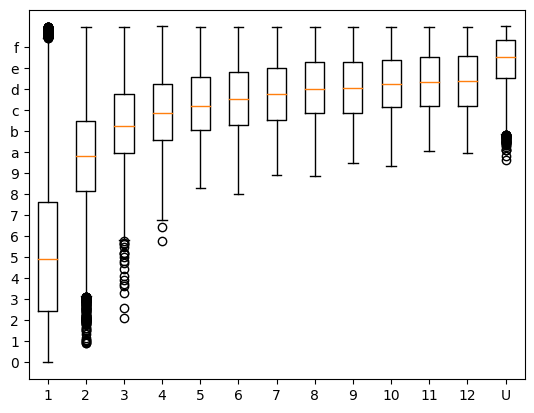

In [7]:
choices = range(1, 14)

plt.boxplot([hex_to_int(b) for b in bins])
plt.xticks(choices, list(range(1, 13)) + ['U'])
ticks, labels = generate_hex_labels()
plt.yticks(ticks, labels)
# plt.ylim(0, 4.295e9)
plt.show()

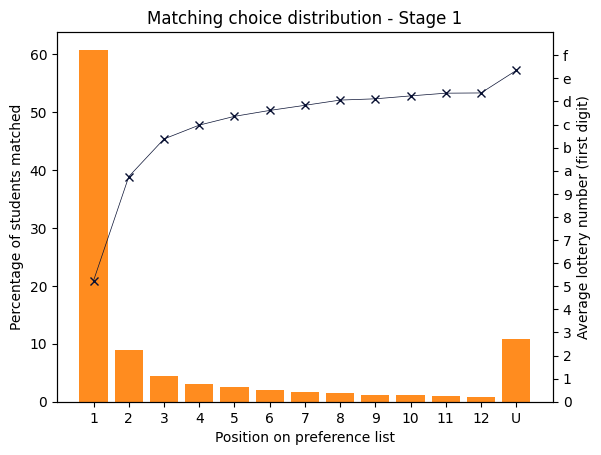

In [8]:
num_students = np.sum(counts)
choices = range(1, 14)

fig, ax1 = plt.subplots()
bars = ax1.bar(choices, 100*counts/num_students, color='#ff8c1f')
bars.set_label('Percentage of matched students')
ax1.set_xticks(choices, list(range(1, 13)) + ['U'])
ax1.set_xlabel('Position on preference list')
ax1.set_ylabel('Percentage of students matched')

ax2 = ax1.twinx()
lot_num, = ax2.plot(choices, hex_to_int(averages), color='#091133', marker='x', linewidth=0.5)
lot_num.set_label('Average lottery number')
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'a', 'b', 'c', 'd', 'e', 'f']
ticks = [int('0x' + str(l) + '0000000', 0) for l in labels]
ax2.set_yticks(ticks, labels)
ax2.set_ylim(0, 4.295e9)
ax2.set_ylabel('Average lottery number (first digit)')

# fig.legend()
ax1.set_facecolor('#ffffff00')
fig.set_facecolor('#ffffff00')
plt.title(f'Matching choice distribution - Stage {stage}')
plt.show()

In [18]:
cumulative_bins = [bins[0]]
for i in range(1, len(bins)-1):
	cumulative_bins.append(cumulative_bins[i-1] + bins[i])

cumulative_counts = np.array([len(bin) for bin in cumulative_bins])
cumulative_averages = [average_lottery_number(bin) for bin in cumulative_bins]

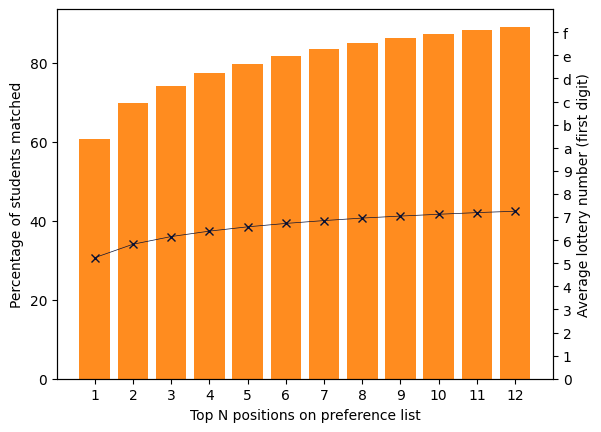

In [20]:
fig, ax1 = plt.subplots()

ax1.bar(choices[:-1], 100*cumulative_counts/num_students, color='#ff8c1f')
ax1.set_xticks(choices[:-1])
ax1.set_xlabel('Top N positions on preference list')
ax1.set_ylabel('Percentage of students matched')

ax2 = ax1.twinx()
ax2.plot(choices[:-1], hex_to_int(cumulative_averages), color='#091133', marker='x', linewidth=0.5)
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'a', 'b', 'c', 'd', 'e', 'f']
label_nums = ['0x' + str(i) + '0000000' for i in labels]
ticks = [int(l, 0) for l in label_nums]
ax2.set_yticks(ticks, labels)
ax2.set_ylim(0, 4.295e9)
ax2.set_ylabel('Average lottery number (first digit)')

ax1.set_facecolor('#ffffff00')
fig.set_facecolor('#ffffff00')
plt.show()

### Aggregate stats

In [12]:
print(f'Percentage of students matched with their first choice: {100*counts[0]/num_students:.2f}%')
print(f'\twith average lottery number (first 8 digits) {hex_to_int(averages)[0]:x}')

print(f'Percentage of students matched with a top 5 choice: {100*cumulative_counts[4]/num_students:.2f}%')
print(f'\twith average lottery number (first 8 digits) {int(cumulative_averages[4]):x}')

print(f'Percentage of students unmatched: {100*counts[-1]/num_students:.2f}%')
print(f'\twith average lottery number (first 8 digits) {hex_to_int(averages)[-1]:x}')

Percentage of students matched with their first choice: 60.75%
	with average lottery number (first 8 digits) 53d71fc1
Percentage of students matched with a top 5 choice: 79.81%
	with average lottery number (first 8 digits) 69350849
Percentage of students unmatched: 10.84%
	with average lottery number (first 8 digits) e57a2404


In [13]:
concat_counts = [i for i in range(1, 13) for _ in range(counts[i-1])]
median_choice = concat_counts[len(concat_counts) // 2]
median_choice

1

In [14]:
num_students = np.sum(counts)
choice_ratio = counts[:-1] / num_students
average_choice = np.sum(choice_ratio * np.array(range(1, 13)))
average_choice

1.9601824561403507

## Plot multiple stages

In [16]:
stages = [1, 2, 3, 4]

bins_dicts = [np.load(f'Data/Simulation/bins_stage{stage}.npy', allow_pickle=True).item() for stage in stages]
bins_mult = [dict_to_list(d) for d in bins_dicts]

counts_mult = [np.array([len(bin) for bin in bins]) for bins in bins_mult]
averages_mult = [[average_lottery_number(bin) for bin in bins] for bins in bins_mult]
medians_mult = [[sorted(bin)[len(bin)//2] for bin in bins] for bins in bins_mult]
mins_mult = [[min(bin) for bin in bins] for bins in bins_mult]
maxs_mult = [[max(bin) for bin in bins] for bins in bins_mult]

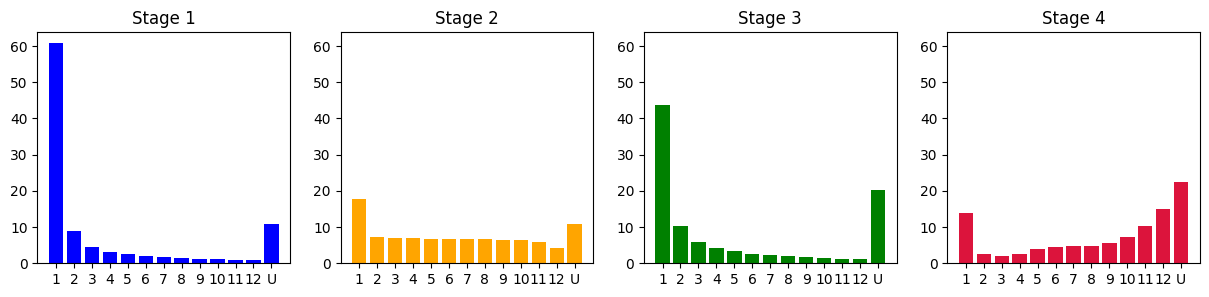

In [45]:
num_students = np.sum(counts_mult[0])
choices = np.array(range(1, 14))

colors = ['blue', 'orange', 'green', 'crimson']
fig, ax = plt.subplots(1, 4, figsize=(15, 3))

for stage in stages:
	axis = ax[stage-1]
	axis.bar(choices, 100*counts_mult[stage-1]/num_students, color=colors[stage-1])
	axis.set_title(f'Stage {stage}')
	axis.set_xticks(choices, list(range(1, 13)) + ['U'])

bottom, top = ax[0].get_ylim()
for axis in ax:
	axis.set_ylim(bottom, top)

plt.show()

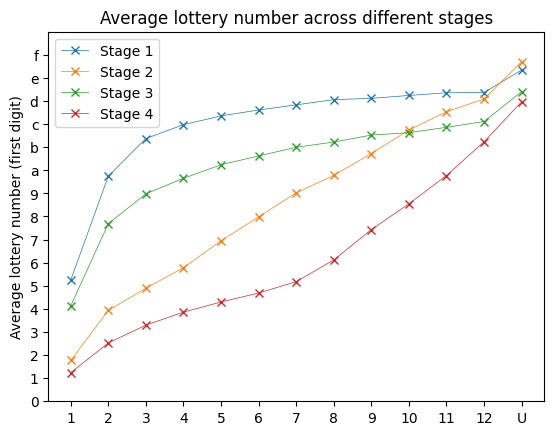

In [18]:
for stage in stages:
	plt.plot(choices, hex_to_int(averages_mult[stage-1]), marker='x', linewidth=0.5, label=f'Stage {stage}')

plt.xticks(choices, list(range(1, 13)) + ['U'])
ticks, labels = generate_hex_labels()
plt.yticks(ticks, labels)
plt.ylim(0, 4.295e9)
plt.ylabel('Average lottery number (first digit)')
plt.legend()
plt.title('Average lottery number across different stages')
plt.show()

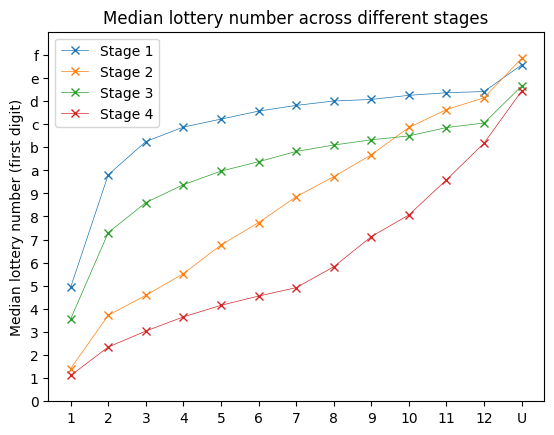

In [19]:
for stage in stages:
	plt.plot(choices, hex_to_int(medians_mult[stage-1]), marker='x', linewidth=0.5, label=f'Stage {stage}')

plt.xticks(choices, list(range(1, 13)) + ['U'])
ticks, labels = generate_hex_labels()
plt.yticks(ticks, labels)
plt.ylim(0, 4.295e9)
plt.ylabel('Median lottery number (first digit)')
plt.legend()
plt.title('Median lottery number across different stages')
plt.show()

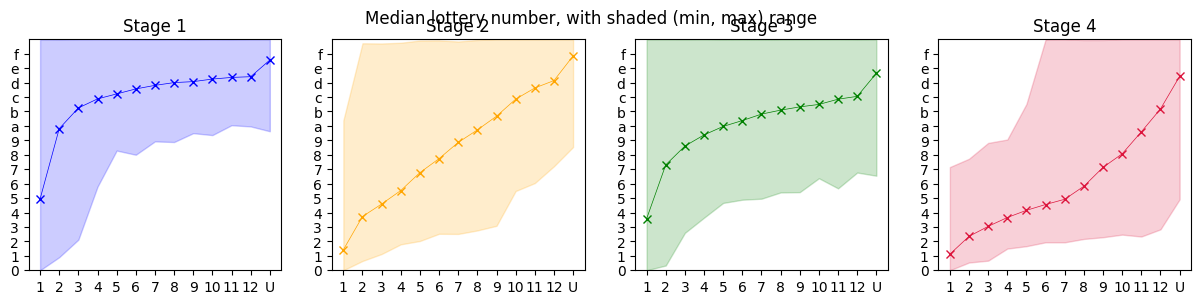

In [50]:
fig, ax = plt.subplots(1, 4, figsize=(15, 3))

for stage in stages:
	axis = ax[stage-1]
	axis.plot(choices, hex_to_int(medians_mult[stage-1]), marker='x', linewidth=0.5, color=colors[stage-1])
	axis.fill_between(choices, hex_to_int(mins_mult[stage-1]), hex_to_int(maxs_mult[stage-1]), alpha=.2, color=colors[stage-1])
	axis.set_title(f'Stage {stage}')
	axis.set_xticks(choices, list(range(1, 13)) + ['U'])
	ticks, labels = generate_hex_labels()
	axis.set_yticks(ticks, labels)

bottom, top = 0, 4.295e9
for axis in ax:
	axis.set_ylim(bottom, top)

fig.suptitle('Median lottery number with shaded (min, max) range')
plt.show()